# This notebook's aim is to transform the pre-processed documents into vectors and do an unsupervised analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jeremynadal33/categorize_question_API/blob/master/unsupervised_approach.ipynb)


## Here, are compared two unsupervised methods : LDA and NMF
## We will compare the results for two different vectorization methods : Bag of Word and Tfidf
First, import the relevant libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import time

## My script : 
from function import *

In [2]:
# Specific libraries : 
import nltk
from sklearn.feature_extraction.text import CountVectorizer # BoW
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf

In [3]:
root_dir = '/Users/jeremynadal/Documents/Formation OC IML/P5-API/'
input_dir = root_dir + 'inputs/'
png_dir = root_dir + 'pngs/'

In [4]:
!ls inputs

posts.csv               processed_dataset.csv   result_nb_topic_lda.csv


In [5]:
data = pd.read_csv(input_dir+'processed_dataset.csv')

print(data.shape)
print(data.dtypes)
data.head()

(39409, 3)
Tags              object
processed_text    object
nb_tags            int64
dtype: object


,Tags,processed_text,nb_tags
0,['c#'],"['convert', 'double', 'c#', 'convert', 'double...",1
1,"['c#', '.net']","['c#', 'calculate', 'someone', 'age', 'base', ...",2
2,['c#'],"['calculate', 'time', 'c#', 'calculate', 'time...",1
3,['html'],"['determine', 'user', 'timezone', 'determine',...",1
4,['.net'],"['difference', 'mathfloor', 'mathtruncate', 'd...",1


The tags and the processed texts are imported as strings and not array of strings...

In [6]:
def reforme_tags_processed_text(data):
    tags = []
    processed_text = []
    for indx in range(data.shape[0]):
        new_tags = []
        new_processed = []
        
        split = data['Tags'][indx].split(',')
        for nb_tags in range(data['nb_tags'][indx]):    
            to_append = re.sub('[\[\]\'\"!*+-]','',split[nb_tags]).replace('\\','').replace(' ','')
            if not to_append in ['',' '] : new_tags.append(to_append)
        tags.append(new_tags)
        
        text = data['processed_text'][indx].split(',')
        for i in range(len(text)):
            to_append = re.sub('[\[\]\'\"!*+-:.]','',text[i]).replace('\\','').replace(' ','')
            if not to_append in ['',' '] : new_processed.append(to_append)
        processed_text.append(new_processed)
        
    data['Tags'] = tags
    data['processed_text'] = processed_text
    return data

In [7]:
data = reforme_tags_processed_text(data)

In [8]:
data

,Tags,processed_text,nb_tags
0,[c#],"[convert, double, c#, convert, double, c#, wan...",1
1,"[c#, .net]","[c#, calculate, someone, age, base, datetime, ...",2
2,[c#],"[calculate, time, c#, calculate, time, c#, giv...",1
3,[html],"[determine, user, timezone, determine, user, t...",1
4,[.net],"[difference, mathfloor, mathtruncate, differen...",1
...,...,...,...
39404,"[html, css]","[prevent, text, td, width, prevent, text, td, ...",2
39405,[android],"[set, attribute, button, layout, set, attribut...",1
39406,[bash],"[loop, directory, delete, file, extension, loo...",1
39407,[java],"[buffer, size, bufferedreader, buffer, size, b...",1


# To begin with, we will intend the method on only a part of the data because the algorithms are supposed to be time-exhaustive 

In [9]:
def get_all_tags(tags):
    res = []
    for i in range(len(tags)):
        for j in range(len(tags[i])):
            res.append(tags[i][j])
            
    return pd.Series(res)

tags = get_all_tags(data['Tags'])

In [10]:
tags

0             c#
1             c#
2           .net
3             c#
4           html
          ...   
51772    android
51773       bash
51774       java
51775         c#
51776       .net
Length: 51777, dtype: object

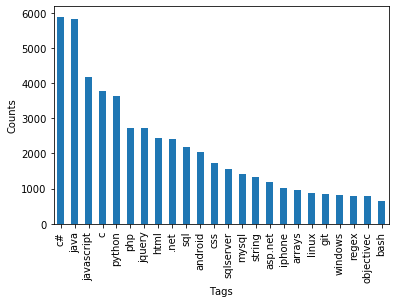

In [11]:
pd.Series(tags).value_counts(normalize=False)[:25].plot(kind = 'bar')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

## Lets start by getting the different vectors : 

In [12]:
data['processed_text']

0        [convert, double, c#, convert, double, c#, wan...
1        [c#, calculate, someone, age, base, datetime, ...
2        [calculate, time, c#, calculate, time, c#, giv...
3        [determine, user, timezone, determine, user, t...
4        [difference, mathfloor, mathtruncate, differen...
                               ...                        
39404    [prevent, text, td, width, prevent, text, td, ...
39405    [set, attribute, button, layout, set, attribut...
39406    [loop, directory, delete, file, extension, loo...
39407    [buffer, size, bufferedreader, buffer, size, b...
39408    [difference, month, two, date, difference, mon...
Name: processed_text, Length: 39409, dtype: object

In [15]:
bow_vectorizer = CountVectorizer(tokenizer = lambda x: x,
                                 preprocessor = lambda x: x,
                                 lowercase = False,
                                 max_features = 1000,
                                 binary = True,
                                 max_df = 0.9
                                 )  
bow_X = bow_vectorizer.fit_transform(data['processed_text'])
print(len(bow_vectorizer.get_feature_names()))
print(bow_vectorizer.get_feature_names())

print(bow_X.toarray().shape)
print(bow_X.toarray())

1000
['#', '%', '_', 'abc', 'absolute', 'accept', 'access', 'accomplish', 'accord', 'account', 'achieve', 'across', 'action', 'activity', 'add', 'added', 'addition', 'address', 'advance', 'advantage', 'advice', 'affect', 'age', 'ajax', 'alert', 'algorithm', 'align', 'alloc', 'allocate', 'allow', 'along', 'alter', 'alternative', 'although', 'amount', 'andor', 'android', 'animation', 'annotation', 'another', 'answer', 'anybody', 'anyone', 'anything', 'apache', 'api', 'app', 'appear', 'append', 'apple', 'application', 'apply', 'appreciate', 'approach', 'apps', 'area', 'args', 'argument', 'around', 'array', 'arraylist', 'article', 'ask', 'asp', 'aspnet', 'assembly', 'assign', 'associate', 'assume', 'attach', 'attempt', 'attr', 'attribute', 'authentication', 'auto', 'avoid', 'b', 'back', 'background', 'backgroundcolor', 'bar', 'base', 'bash', 'batch', 'become', 'begin', 'behavior', 'behaviour', 'behind', 'believe', 'benefit', 'bind', 'bit', 'block', 'blog', 'body', 'book', 'bool', 'boolean'

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [16]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x,
                                   preprocessor = lambda x: x,
                                   lowercase = False,
                                   max_features = 1000,
                                   max_df = 0.9
                                   )  
tfidf_X = tfidf_vectorizer.fit_transform(data['processed_text'])
print(tfidf_vectorizer.get_feature_names())

print(tfidf_X.toarray())

['#', '%', '_', 'abc', 'absolute', 'accept', 'access', 'accomplish', 'accord', 'account', 'achieve', 'across', 'action', 'activity', 'add', 'address', 'advance', 'advantage', 'advice', 'affect', 'age', 'ajax', 'alert', 'algorithm', 'align', 'allocate', 'allow', 'along', 'alter', 'alternative', 'although', 'amount', 'anchor', 'android', 'animate', 'animation', 'annotation', 'another', 'answer', 'anybody', 'anyone', 'anything', 'apache', 'api', 'app', 'appear', 'append', 'apple', 'application', 'apply', 'appreciate', 'approach', 'apps', 'area', 'args', 'argument', 'around', 'array', 'arraylist', 'article', 'ask', 'asp', 'aspnet', 'assembly', 'assign', 'assume', 'attach', 'attempt', 'attr', 'attribute', 'authentication', 'author', 'auto', 'avoid', 'b', 'back', 'background', 'backgroundcolor', 'backup', 'bar', 'base', 'bash', 'batch', 'bean', 'become', 'begin', 'behavior', 'behind', 'believe', 'bind', 'bit', 'bitmap', 'blah', 'block', 'body', 'book', 'bool', 'boolean', 'boost', 'border', '

## Looking for the best number of topics using coherence as well as jaccard similarity

In [253]:
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
dirichlet_dict = corpora.Dictionary(data["processed_text"],prune_at=1000)

bow_corpus = [dirichlet_dict.doc2bow(text) for text in data['processed_text']]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [255]:
print(len(bow_corpus))

39409


/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
# Considering 10-19 topics, as the last is cut off
num_topics = list(range(10,20)[1:])
num_keywords = 10

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=20,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
num_topics = list(range(24,30)[1:])
num_keywords = 10
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=20,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
num_topics = list(range(10,30)[1:])
num_topics

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [257]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
coherences = [CoherenceModel(model=LDA_models[i], texts=data['processed_text'], dictionary=dirichlet_dict, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [295]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(len(coherences))] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [301]:
LDA_models

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{11: <gensim.models.ldamodel.LdaModel at 0x7f9121764f50>,
 12: <gensim.models.ldamodel.LdaModel at 0x7f9121764850>,
 13: <gensim.models.ldamodel.LdaModel at 0x7f9127f1ea90>,
 14: <gensim.models.ldamodel.LdaModel at 0x7f915dd38f10>,
 15: <gensim.models.ldamodel.LdaModel at 0x7f91280e0590>,
 16: <gensim.models.ldamodel.LdaModel at 0x7f9121759910>,
 17: <gensim.models.ldamodel.LdaModel at 0x7f9127f1ee10>,
 18: <gensim.models.ldamodel.LdaModel at 0x7f9121772b50>,
 19: <gensim.models.ldamodel.LdaModel at 0x7f9121772a90>,
 20: <gensim.models.ldamodel.LdaModel at 0x7f912806bd90>,
 21: <gensim.models.ldamodel.LdaModel at 0x7f91280e1ad0>,
 22: <gensim.models.ldamodel.LdaModel at 0x7f91280ed490>,
 23: <gensim.models.ldamodel.LdaModel at 0x7f9121607c10>,
 24: <gensim.models.ldamodel.LdaModel at 0x7f91280abcd0>,
 25: <gensim.models.ldamodel.LdaModel at 0x7f9127a85390>,
 26: <gensim.models.ldamodel.LdaModel at 0x7f9127a1d1d0>,
 27: <gensim.models.ldamodel.LdaModel at 0x7f912175f250>,
 28: <gensim.m

In [307]:
df = pd.DataFrame()
df['coherences'] = coherences
df['mean_stab'] = mean_stabilities
df['nb_topic'] = df.index + 11
df.to_csv(input_dir+'result_nb_topic_lda.csv',index=False)

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


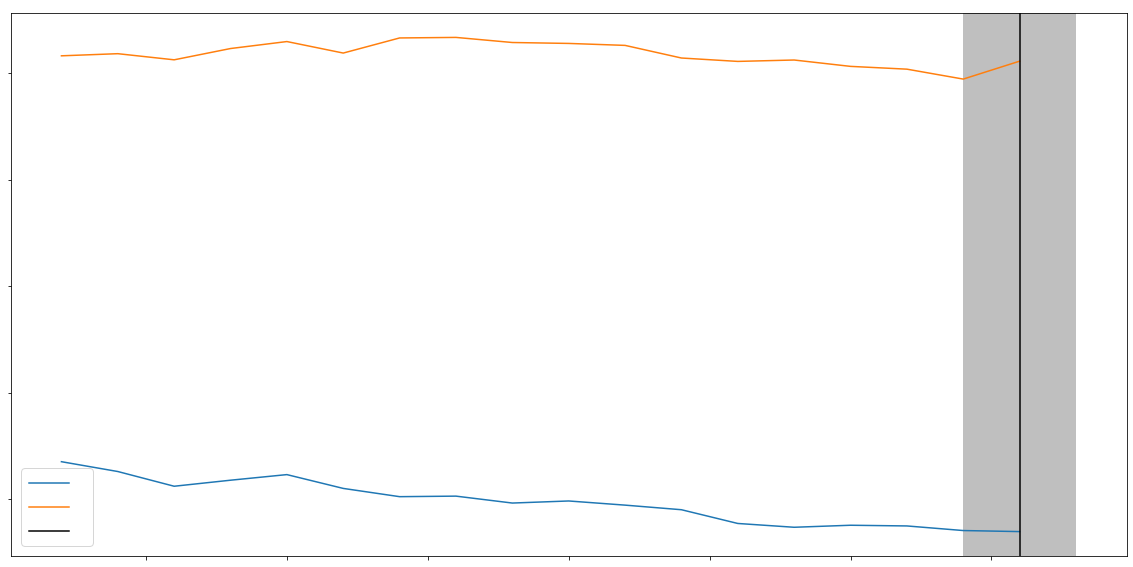

In [297]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
#ax.set_ylim([0, y_max])
#ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
#plt.savefig(png_dir+'compare_nb_topics_LDA_bis.png')
plt.show()

In [279]:
10+np.argmax(coherences)

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17

## The best number of topics in our case seems to be 17 so now we train the LDA model from sklearn : 

In [25]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def plot_top_words(model, feature_names, n_top_words, title, save = None):
    fig, axes = plt.subplots(3, 6, figsize=(30, 15), sharex=False)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    if type(save) == str :
        plt.savefig(png_dir+save)
    plt.show()



/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 17

# Créer le modèle LDA
lda_17 = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda_17.fit(bow_X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=17, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [27]:
# Créer le modèle LDA
lda_17_tfidf = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda_17_tfidf.fit(tfidf_X)

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=17, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [19]:
no_top_words = 10
display_topics(lda_17, bow_vectorizer.get_feature_names(), 10)

Topic 0:
question find answer nt see ask mean understand example look
Topic 1:
line command script character output use execute website run bash
Topic 2:
difference android id exist v api achieve warn notice exists
Topic 3:
python print import file tried use match git want line
Topic 4:
class object return get value string method use list type
Topic 5:
java use c code # program int class c# read
Topic 6:
app use application web provide server know client create please
Topic 7:
try nt problem work get take code seem read ca
Topic 8:
like way want would check something variable example value list
Topic 9:
would one use like know wonder way explain need time
Topic 10:
table sql query use select database column get date row
Topic 11:
php use get send data file string http format like
Topic 12:
html use want div like work text element cs id
Topic 13:
click button form input jquery javascript function user use event
Topic 14:
exception error void code call cause throw e message catch
Topic 1

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


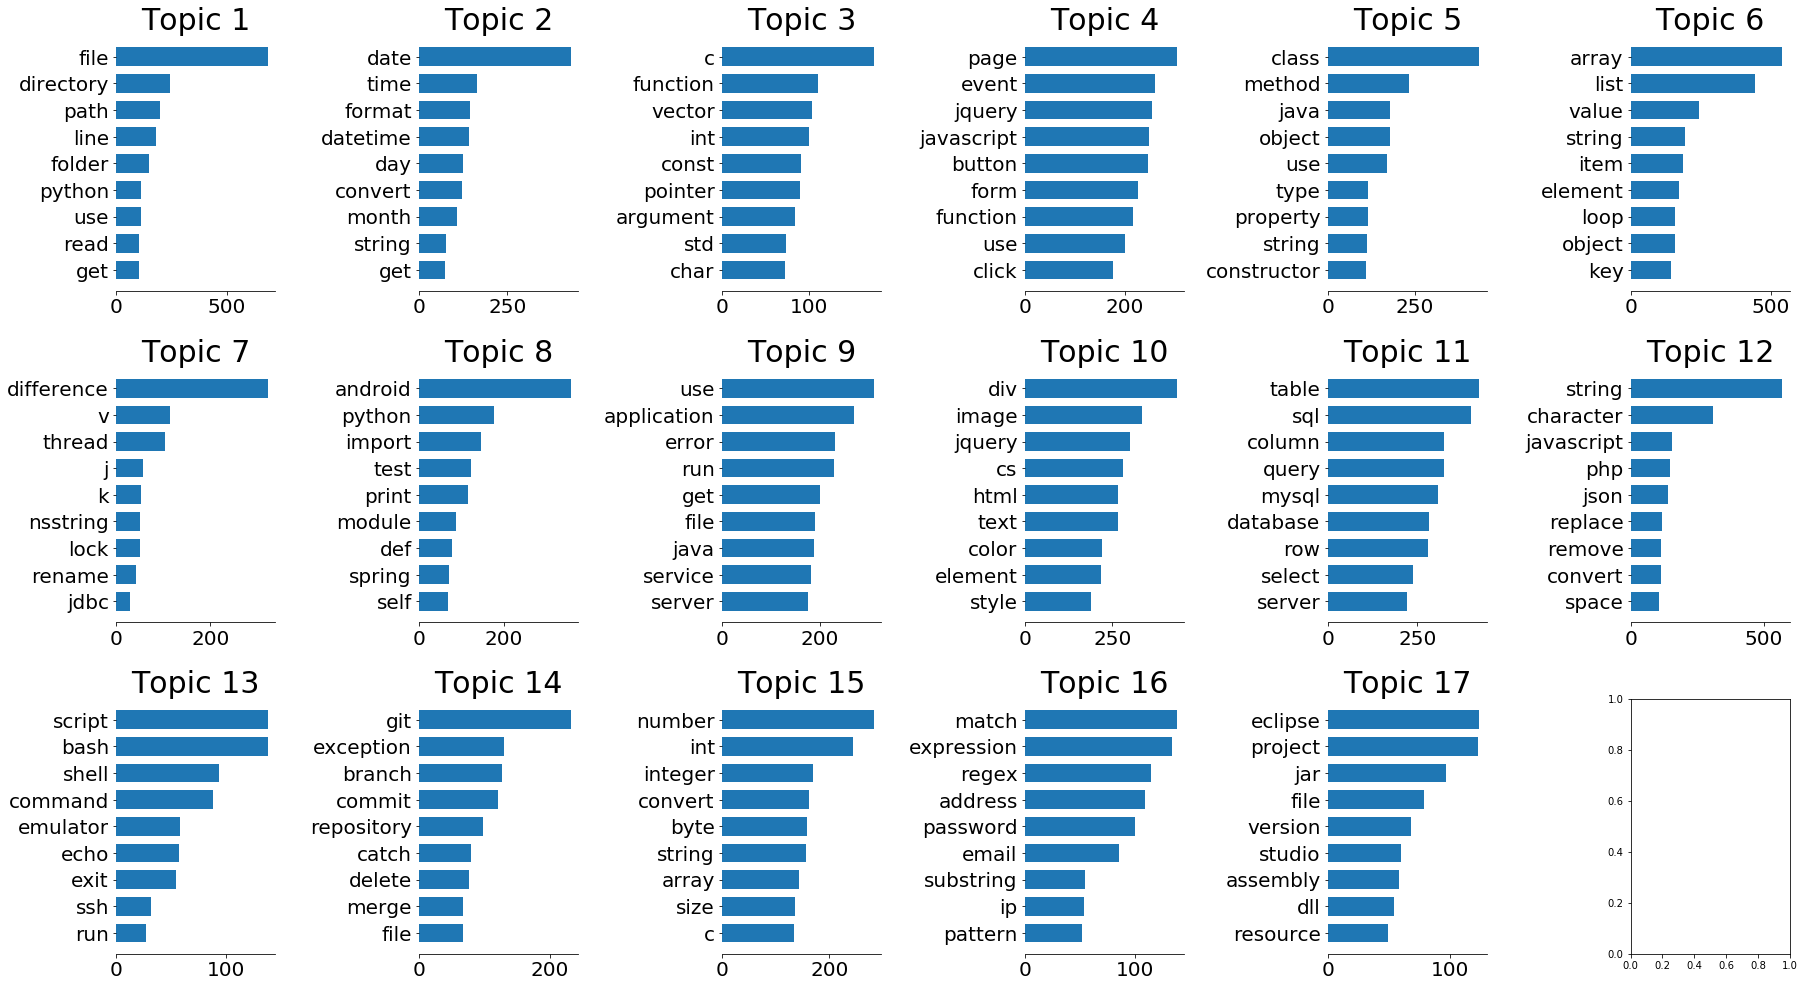

In [28]:
no_top_words = 9
plot_top_words(lda_17_tfidf, tfidf_vectorizer.get_feature_names(), no_top_words, '' ,save='top_9_lda_tfidf.png')

In [23]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [29]:
pyLDAvis.sklearn.prepare(lda_17_tfidf, tfidf_X, bow_vectorizer)

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.025763  0.004215       1        1  15.750315
3     -0.062547  0.055273       2        1  11.601287
9     -0.071453  0.066977       3        1  11.146125
10    -0.091655  0.046757       4        1   8.652398
14    -0.118575 -0.010154       5        1   6.738581
4     -0.095876 -0.099724       6        1   6.655854
5     -0.129395  0.001480       7        1   6.195675
0     -0.043987  0.043149       8        1   5.717289
11    -0.129411  0.061614       9        1   5.641180
1     -0.090265  0.038633      10        1   3.889314
2      0.002044 -0.194739      11        1   3.146548
13     0.029878 -0.019818      12        1   3.130704
7     -0.016538 -0.095968      13        1   3.049649
16     0.101173 -0.093681      14        1   2.609876
15     0.034194  0.192744      15        1   2.447696
6      0.317778 -0.226471      16        1   1.925861
12     0.390397  0.229714      17        1   1.701647, topic_info=          Term         Freq        Total Category  logprob  loglift
268        div   856.000000   856.000000  Default  30.0000  30.0000
780     second   676.000000   676.000000  Default  29.0000  29.0000
362    firefox  1323.000000  1323.000000  Default  28.0000  28.0000
33    although   545.000000   545.000000  Default  27.0000  27.0000
81        base   421.000000   421.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
239        def     0.171895    48.588323  Topic17  -9.5052  -1.5707
509     length     0.171892    75.364676  Topic17  -9.5052  -2.0097
428       http     0.171886    79.476961  Topic17  -9.5052  -2.0628
199  container     0.171885    47.420809  Topic17  -9.5052  -1.5464
513         li     0.171884   121.106039  Topic17  -9.5052  -2.4840

[838 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.104598      #
0         2  0.098705      #
0         3  0.203303      #
0         4  0.035357      #
0         5  0.083973      #
...     ...       ...    ...
996       5  0.974184  yield
997       5  0.041438      z
997       8  0.932364      z
998      15  0.973414   zero
999      11  0.949114    zip

[3490 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 10, 11, 15, 5, 6, 1, 12, 2, 3, 14, 8, 17, 16, 7, 13])

## LDA takes as hypothesis the fact that the latent topics are independent from one to the other which is surely not the case in our dataset, lets try to implement NMF

In [30]:
from sklearn.decomposition import NMF 

nmf_bow = NMF(n_components=17, random_state = 42 ).fit(bow_X)
nmf_tfidf = NMF(n_components=17, random_state = 42 ).fit(tfidf_X)

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


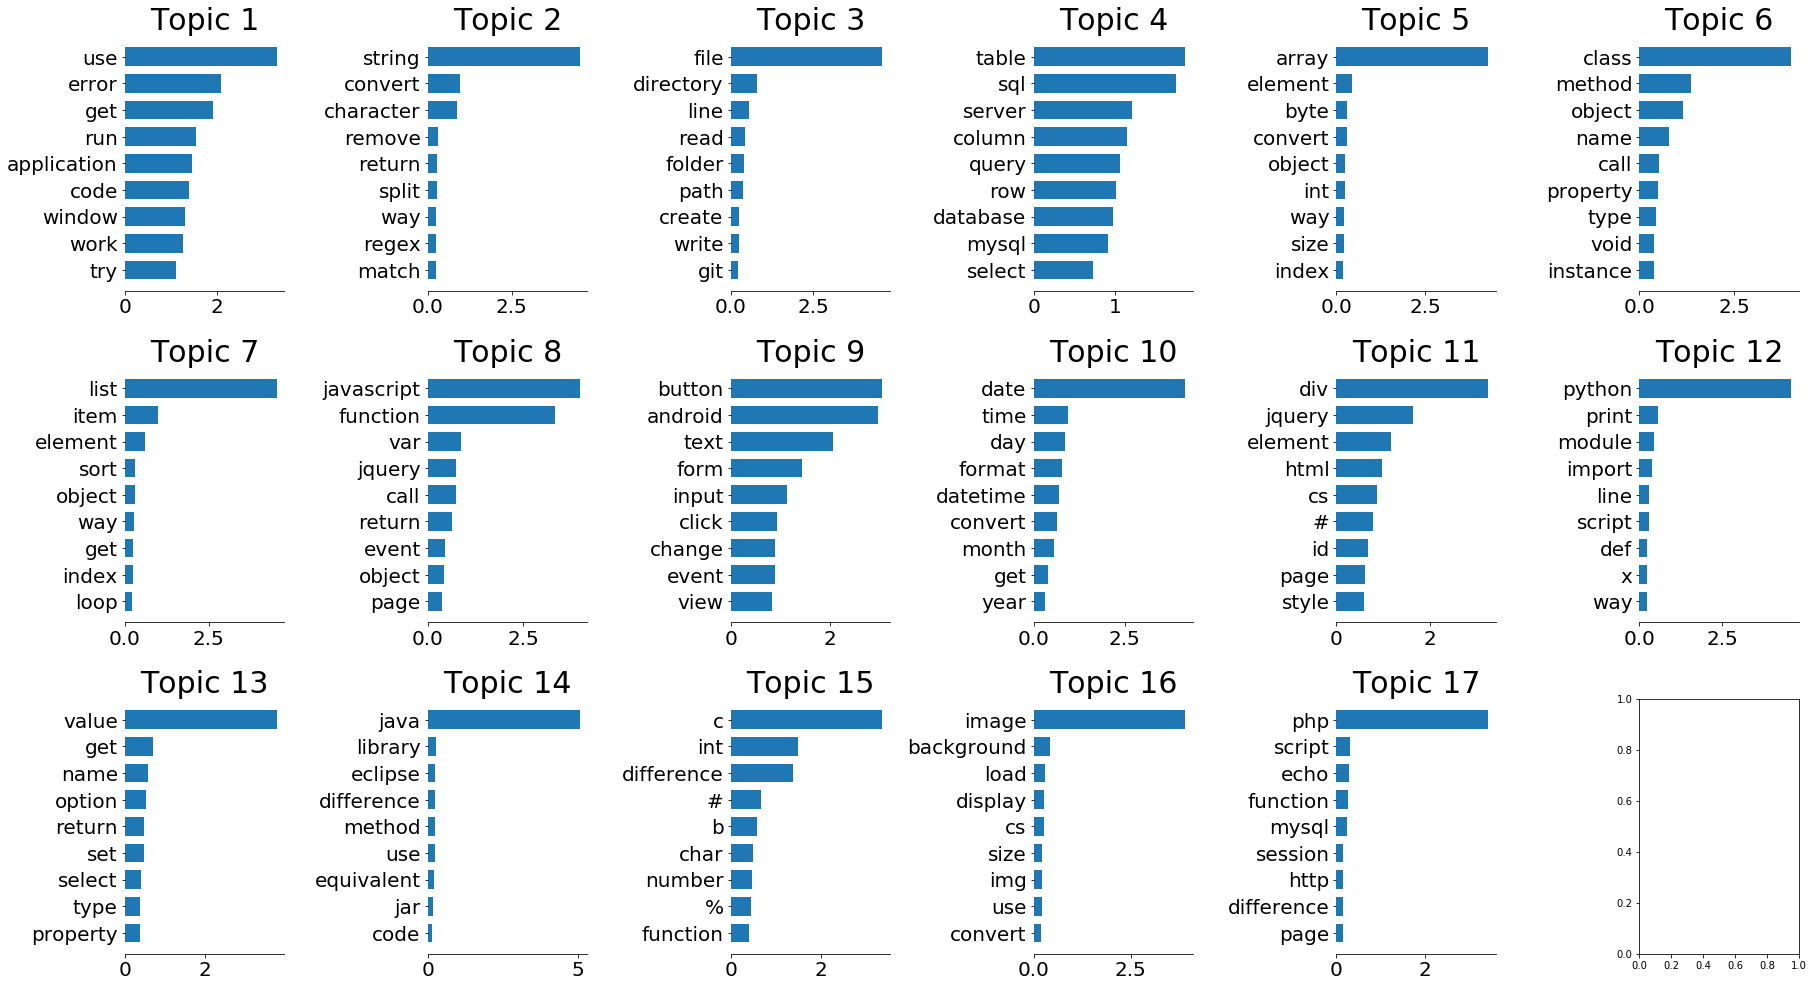

In [31]:
no_top_words = 9
plot_top_words(nmf_tfidf, tfidf_vectorizer.get_feature_names(), no_top_words, '' ,save='top_9_nmf_tfidf.png')

/Users/jeremynadal/anaconda3/envs/fieldbox/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


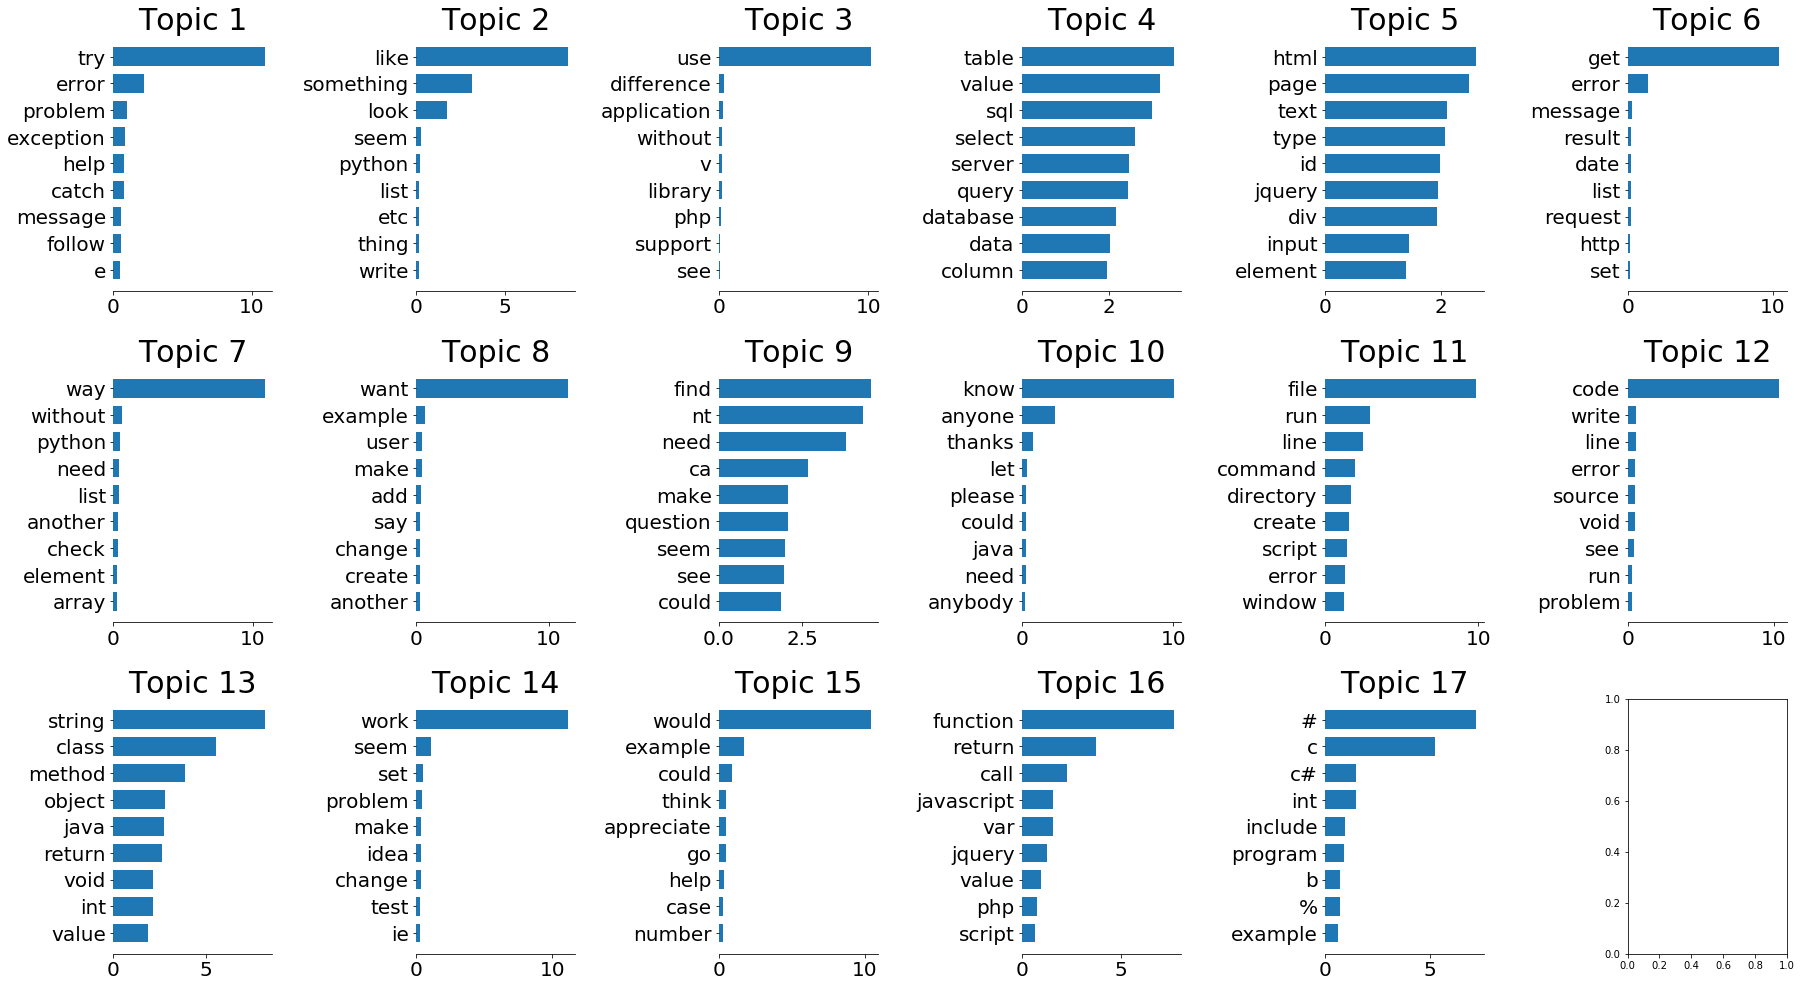

In [32]:
no_top_words = 9
plot_top_words(nmf_bow, bow_vectorizer.get_feature_names(), no_top_words, '' ,save='top_9_nmf_bow.png')